## Polynomial Regression

In [1]:
#(Only one feature)Univariate Linear regression type
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

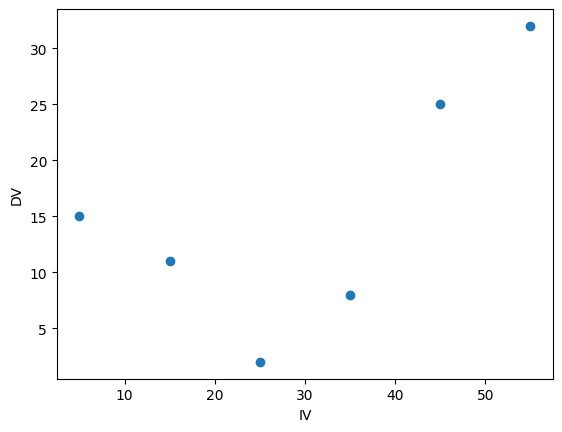

In [3]:
plt.scatter(x,y)
plt.xlabel("IV")
plt.ylabel("DV")
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [6]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [9]:
x_new=transformer.transform(x)
print(x_new)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [12]:
MLR=LinearRegression()

In [13]:
MLR.fit(x_new,y)

LinearRegression()

In [15]:
y_pred=MLR.intercept_+np.sum(MLR.coef_*x_new,axis=1)
print(y_pred)

[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


MSE: 11.305952380952384
Intercept= 21.37232142857144
Slope= [-1.32357143  0.02839286]


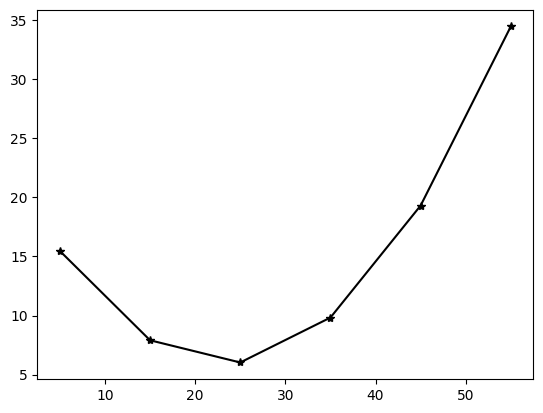

In [17]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y,y_pred)
plt.plot(x,y_pred,color='Black',marker='*')

print("MSE:",mse)
print("Intercept=",MLR.intercept_)
print("Slope=",MLR.coef_)

In [18]:
#for Multivariate Regression type
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
x1=np.array([[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]).reshape((-1,2))
y1=np.array([4, 5, 20, 14, 32, 22, 38, 43])

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [25]:
transformer1 = PolynomialFeatures(degree=2, include_bias=False)

In [27]:
transformer1.fit(x1)

PolynomialFeatures(include_bias=False)

In [29]:
x_new1=transformer1.transform(x1)
print(x_new1)

[[0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [5.000e+00 1.000e+00 2.500e+01 5.000e+00 1.000e+00]
 [1.500e+01 2.000e+00 2.250e+02 3.000e+01 4.000e+00]
 [2.500e+01 5.000e+00 6.250e+02 1.250e+02 2.500e+01]
 [3.500e+01 1.100e+01 1.225e+03 3.850e+02 1.210e+02]
 [4.500e+01 1.500e+01 2.025e+03 6.750e+02 2.250e+02]
 [5.500e+01 3.400e+01 3.025e+03 1.870e+03 1.156e+03]
 [6.000e+01 3.500e+01 3.600e+03 2.100e+03 1.225e+03]]


In [31]:
MLR1=LinearRegression()

In [32]:
MLR1.fit(x_new1,y1)

LinearRegression()

In [33]:
y_pred1=MLR1.intercept_+np.sum(MLR1.coef_*x_new1,axis=1)
print(y_pred1)

[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


MSE: 10.089451361420558
Intercept= 0.8430556452395876
Slope= [ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]


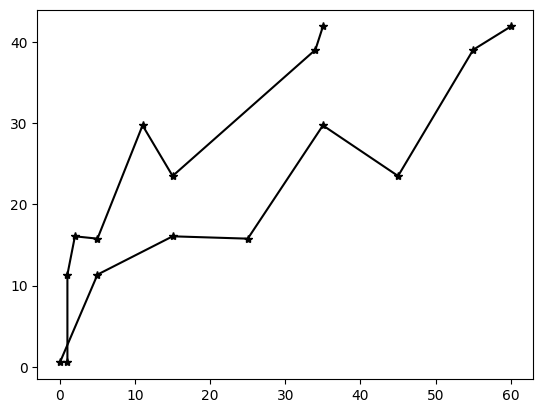

In [36]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y1,y_pred1)
plt.plot(x1,y_pred1,color='Black',marker='*')

print("MSE:",mse)
print("Intercept=",MLR1.intercept_)
print("Slope=",MLR1.coef_)